## Task 5: Flight Risk Identification

#### Identify employees at risk of leaving based on negative email activity:
1. Flight risk: any employee who sends 4 or more negative messages in a rolling 30-day window.

In [1]:
import pandas as pd

# Load sentiment-labeled dataset
df = pd.read_csv("test_with_sentiment.csv")

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Filter only negative messages
neg_df = df[df['sentiment_label'] == 'Negative'].copy()

# Sort by employee and date
neg_df.sort_values(by=['from', 'date'], inplace=True)

# Initialize a column to flag flight risk
neg_df['flight_risk_flag'] = 0

# Group by employee and check rolling 30-day negative message count
flight_risk_employees = set()

for employee, group in neg_df.groupby('from'):
    dates = group['date'].tolist()
    
    # Use sliding window approach
    start_idx = 0
    for end_idx in range(len(dates)):
        # Move start index until window <= 30 days
        while (dates[end_idx] - dates[start_idx]).days > 30:
            start_idx += 1
        
        # Check if window contains 4 or more negative messages
        if end_idx - start_idx + 1 >= 4:
            flight_risk_employees.add(employee)
            break

# Convert to DataFrame for export
flight_risk_df = pd.DataFrame({'flight_risk_employee': list(flight_risk_employees)})

# Save results
flight_risk_df.to_csv("flight_risk_employees.csv", index=False)

# Preview
flight_risk_df.head()


,flight_risk_employee
0,johnny.palmer@enron.com
1,sally.beck@enron.com
2,bobette.riner@ipgdirect.com
3,don.baughman@enron.com


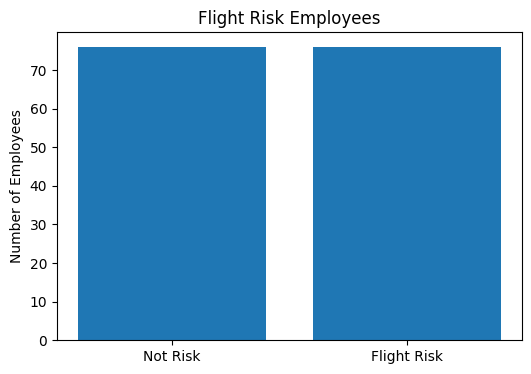

In [3]:
import matplotlib.pyplot as plt

# Count of flight risk employees
flight_risk_counts = neg_df['from'].isin(flight_risk_employees).value_counts()

plt.figure(figsize=(6,4))
plt.bar(['Not Risk', 'Flight Risk'], flight_risk_counts)
plt.title('Flight Risk Employees')
plt.ylabel('Number of Employees')
plt.show()


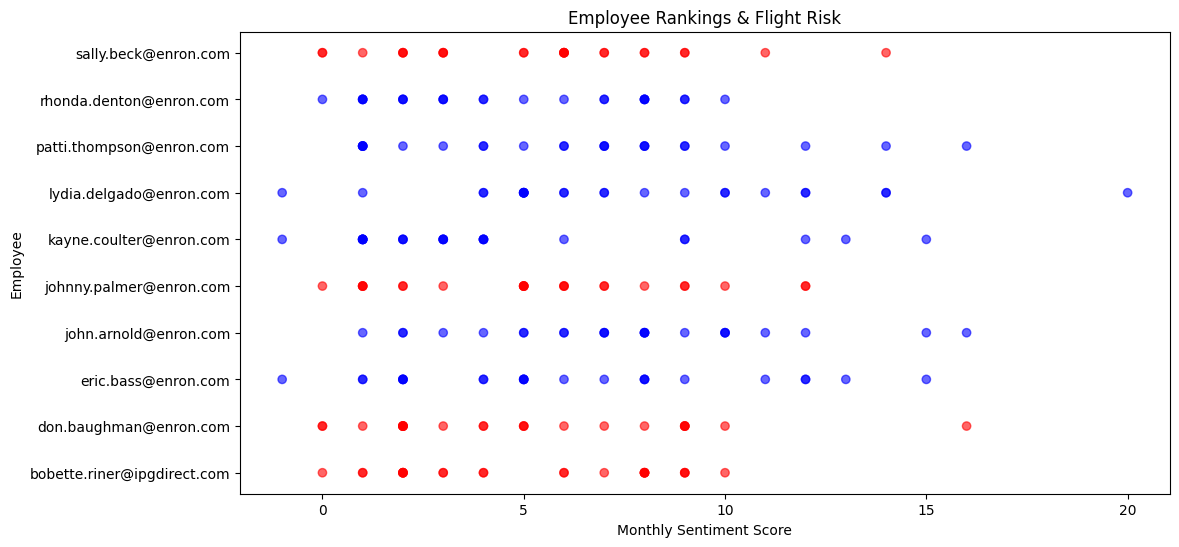

In [4]:
# Merge flight risk info with monthly rankings
ranking_df = pd.read_csv("employee_monthly_sentiment_scores.csv")
ranking_df['is_flight_risk'] = ranking_df['from'].isin(flight_risk_employees)

plt.figure(figsize=(12,6))
plt.scatter(ranking_df['monthly_sentiment_score'], ranking_df['from'],
            c=ranking_df['is_flight_risk'].map({True:'red', False:'blue'}),
            alpha=0.6)
plt.xlabel('Monthly Sentiment Score')
plt.ylabel('Employee')
plt.title('Employee Rankings & Flight Risk')
plt.show()


##### Flight risk employees were identified by analyzing negative message patterns over rolling 30-day windows. Any employee who sent four or more negative messages within any 30-day span was flagged as a potential flight risk. This approach ensures that high-frequency negative sentiment is detected, independent of calendar months, providing a robust early-warning system for employee engagement and retention concerns.